In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = 'insurance.csv'
data = pd.read_csv(file_path)

In [13]:
# View the first few rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
data.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [19]:
# Calculate central tendency statistics
mean_charges = data['charges'].mean()
print(f"Mean Charges: {mean_charges}")

Mean Charges: 13270.422265141257


In [21]:
median_charges = data['charges'].median()
print(f"Median Charges: {median_charges}")

Median Charges: 9382.033


In [23]:
mode_region = data['region'].mode()[0]
print(f"Most Common Region: {mode_region}")

Most Common Region: southeast


In [25]:
# Calculate dispersion statistics
range_charges = data['charges'].max() - data['charges'].min()
print(f"Range of Charges: {range_charges}")

Range of Charges: 62648.554110000005


In [27]:
variance_charges = data['charges'].var()
print(f"Variance of Charges: {variance_charges}")

Variance of Charges: 146652372.1528548


In [29]:
std_dev_charges = data['charges'].std()
print(f"Standard Deviation of Charges: {std_dev_charges}")

Standard Deviation of Charges: 12110.011236693994


In [31]:
# Calculate percentiles
q1 = data['charges'].quantile(0.25)
median = data['charges'].quantile(0.50)
q3 = data['charges'].quantile(0.75)

print(f"25th Percentile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"75th Percentile (Q3): {q3}")

25th Percentile (Q1): 4740.28715
Median (Q2): 9382.033
75th Percentile (Q3): 16639.912515


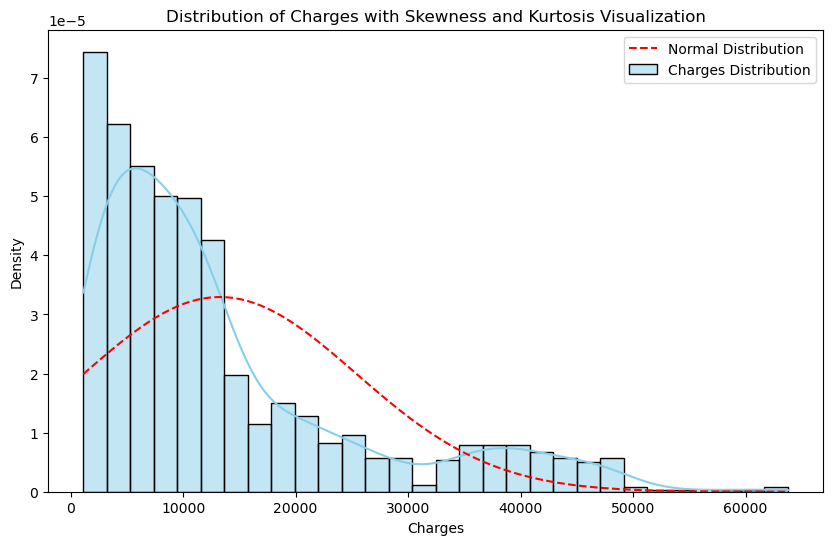

In [35]:
# Histogram and KDE plot for 'charges' with normal distribution curve overlay
plt.figure(figsize=(10, 6))

# Plot histogram and KDE for 'charges'
sns.histplot(data['charges'], bins=30, kde=True, color='skyblue', stat="density", label="Charges Distribution")

# Overlay normal distribution for comparison
mean_charges = data['charges'].mean()
std_dev_charges = data['charges'].std()
x = np.linspace(data['charges'].min(), data['charges'].max(), 100)
normal_dist = (1 / (np.sqrt(2 * np.pi * std_dev_charges**2))) * np.exp(-((x - mean_charges)**2) / (2 * std_dev_charges**2))
plt.plot(x, normal_dist, color='red', linestyle='--', label="Normal Distribution")

# Adding titles and labels
plt.title("Distribution of Charges with Skewness and Kurtosis Visualization")
plt.xlabel("Charges")
plt.ylabel("Density")
plt.legend()

plt.show()


In [37]:
from scipy.stats import skew, kurtosis

# Calculate skewness for the 'charges' column
charges_skewness = skew(data['charges'])

print(f"Skewness of Charges: {charges_skewness}")

# Interpretation
if charges_skewness > 0:
    skew_description = "positively skewed (right-skewed)"
elif charges_skewness < 0:
    skew_description = "negatively skewed (left-skewed)"
else:
    skew_description = "approximately symmetric"

print(f"The distribution of charges is {skew_description}.")

Skewness of Charges: 1.5141797118745743
The distribution of charges is positively skewed (right-skewed).


In [39]:
from scipy.stats import skew, kurtosis

# Calculate kurtosis for the 'charges' column
charges_kurtosis = kurtosis(data['charges'], fisher=True)  # Fisher's kurtosis (0 for normal distribution)

print(f"Kurtosis of Charges: {charges_kurtosis}")

# Interpretation
if charges_kurtosis > 0:
    kurtosis_description = "leptokurtic (more peaked than normal)"
elif charges_kurtosis < 0:
    kurtosis_description = "platykurtic (flatter than normal)"
else:
    kurtosis_description = "mesokurtic (similar to normal distribution)"

print(f"The distribution of charges is {kurtosis_description}.")


Kurtosis of Charges: 1.595821363956751
The distribution of charges is leptokurtic (more peaked than normal).


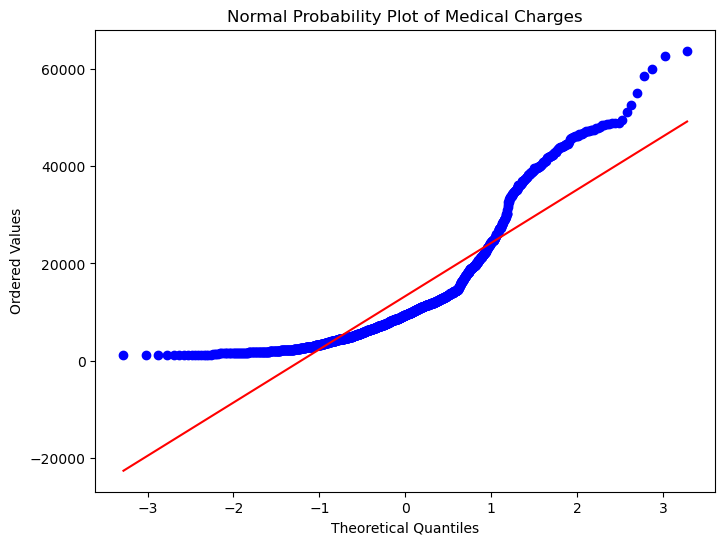

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Normal Probability Plot for 'charges'
plt.figure(figsize=(8, 6))
probplot(data['charges'], dist="norm", plot=plt)
plt.title("Normal Probability Plot of Medical Charges")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

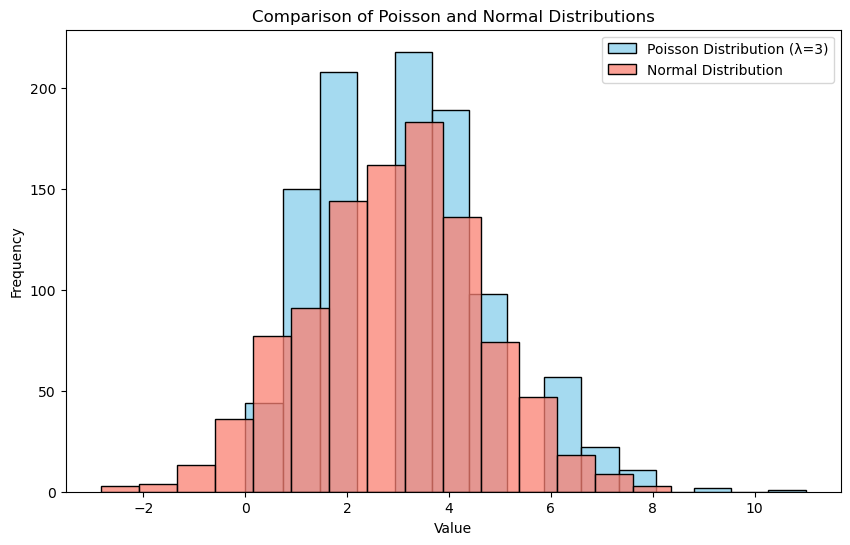

In [43]:
# Simulate Poisson-distributed data with λ = 3 (e.g., average number of medical visits per week)
lambda_val = 3
poisson_data = np.random.poisson(lambda_val, 1000)

# Simulate normal data with the same mean and variance as Poisson data for comparison
normal_data = np.random.normal(lambda_val, np.sqrt(lambda_val), 1000)

# Plot both distributions
plt.figure(figsize=(10, 6))
sns.histplot(poisson_data, color='skyblue', bins=15, kde=False, label="Poisson Distribution (λ=3)")
sns.histplot(normal_data, color='salmon', bins=15, kde=False, label="Normal Distribution")
plt.title("Comparison of Poisson and Normal Distributions")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

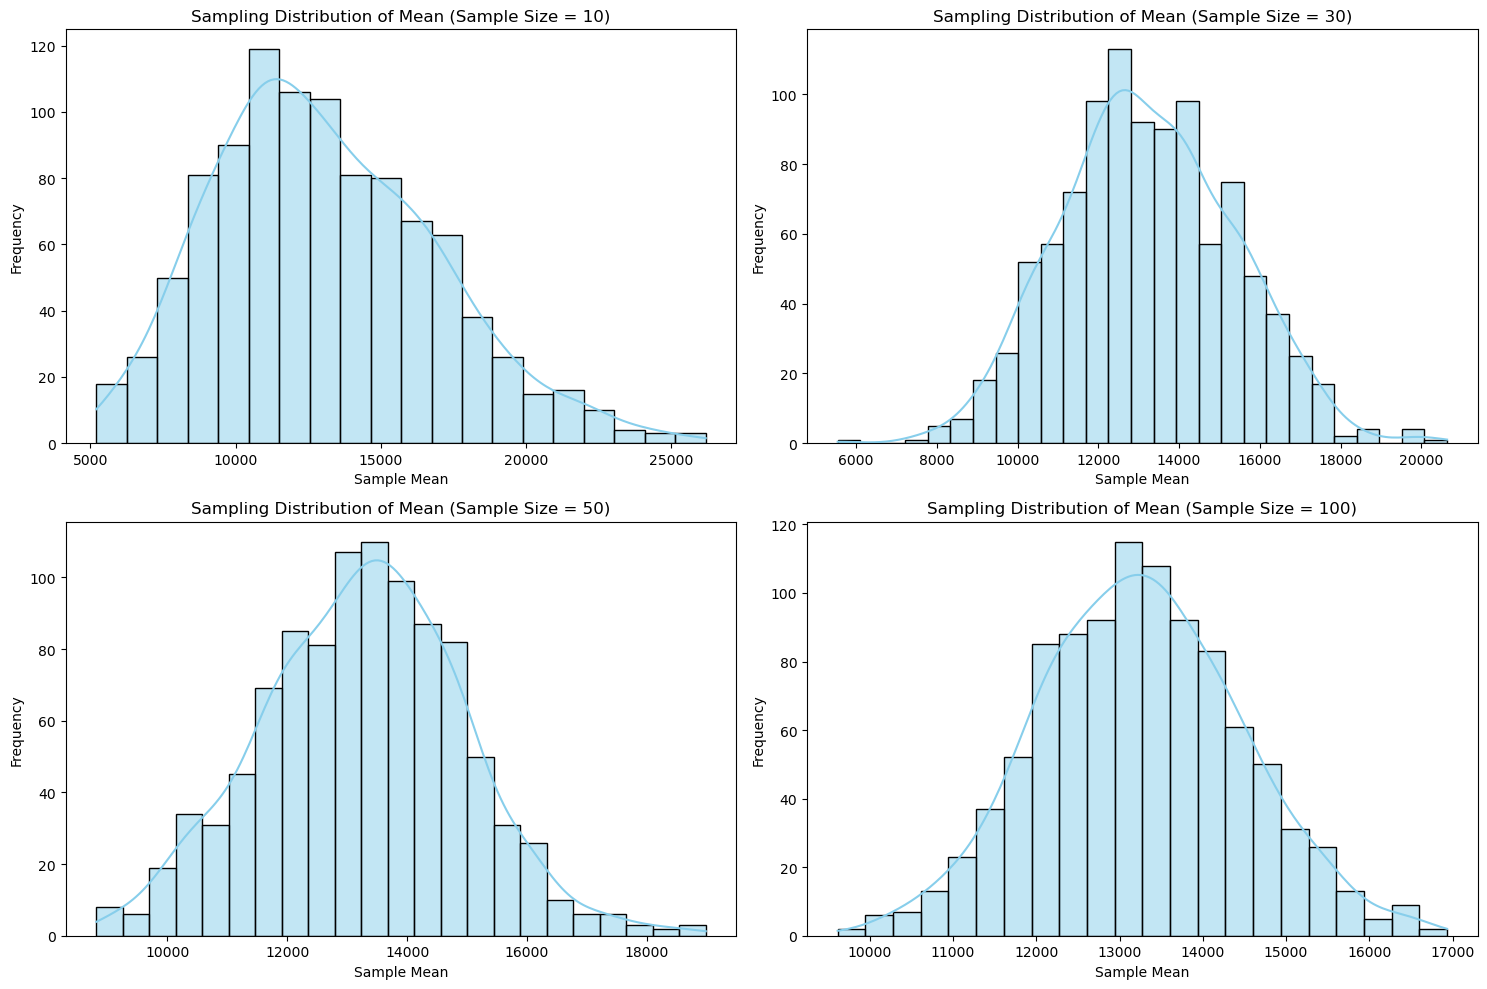

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on 'charges' column
population_data = data['charges']

# Function to simulate sample means for different sample sizes
def simulate_sample_means(sample_size, n_simulations=1000):
    sample_means = [np.mean(np.random.choice(population_data, sample_size, replace=True))
                    for _ in range(n_simulations)]
    return sample_means

# Sample sizes to test CLT
sample_sizes = [10, 30, 50, 100]

plt.figure(figsize=(15, 10))
for i, size in enumerate(sample_sizes, 1):
    plt.subplot(2, 2, i)
    sample_means = simulate_sample_means(size)
    sns.histplot(sample_means, kde=True, color='skyblue')
    plt.title(f'Sampling Distribution of Mean (Sample Size = {size})')
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [47]:
# Population mean and standard deviation
population_mean = np.mean(population_data)
population_std_dev = np.std(population_data)

print(f"Population Mean: {population_mean:.2f}")
print(f"Population Standard Deviation: {population_std_dev:.2f}")

# Calculate sample means and standard deviations for different sample sizes
results = []
for size in sample_sizes:
    sample_means = simulate_sample_means(size)
    sample_mean_of_means = np.mean(sample_means)
    sample_std_dev_of_means = np.std(sample_means)
    theoretical_std_dev = population_std_dev / np.sqrt(size)
    results.append((size, sample_mean_of_means, sample_std_dev_of_means, theoretical_std_dev))

# Display results
print("\nSample Size | Sample Mean of Means | Sample Std Dev of Means | Theoretical Std Dev")
for size, mean_of_means, std_dev_of_means, theoretical_std_dev in results:
    print(f"{size:<12} | {mean_of_means:.2f}              | {std_dev_of_means:.2f}                | {theoretical_std_dev:.2f}")

Population Mean: 13270.42
Population Standard Deviation: 12105.48

Sample Size | Sample Mean of Means | Sample Std Dev of Means | Theoretical Std Dev
10           | 13397.22              | 3807.88                | 3828.09
30           | 13225.96              | 2178.08                | 2210.15
50           | 13266.70              | 1673.83                | 1711.97
100          | 13232.33              | 1172.17                | 1210.55


In [51]:
import numpy as np
from scipy.stats import norm

# Sample data (e.g., 'charges' variable)
data = data['charges']
sample = np.random.choice(data, size=50, replace=False)  # Draw a sample
sample_mean = np.mean(sample)
sample_std_dev = np.std(sample, ddof=1)  # Sample standard deviation
n = len(sample)

# Confidence levels and corresponding Z-scores
confidence_levels = [0.90, 0.95, 0.99]
for confidence in confidence_levels:
    z_score = norm.ppf(1 - (1 - confidence) / 2)
    margin_of_error = z_score * (sample_std_dev / np.sqrt(n))
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    print(f"{int(confidence * 100)}% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

90% Confidence Interval: [10223.31, 16853.01]
95% Confidence Interval: [9588.27, 17488.05]
99% Confidence Interval: [8347.13, 18729.19]


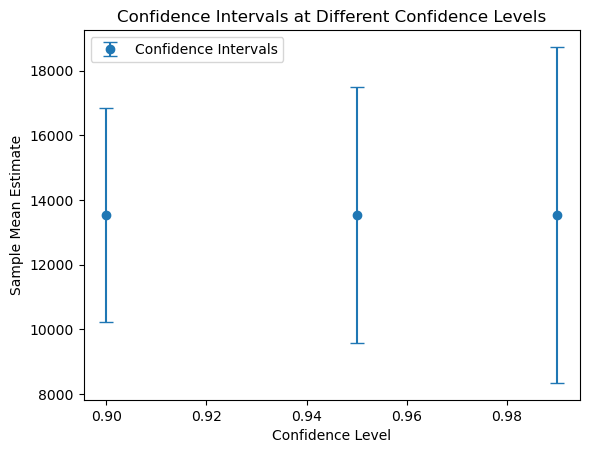

In [53]:
import matplotlib.pyplot as plt

# Plotting confidence intervals
confidence_levels = [0.90, 0.95, 0.99]
ci_lower_bounds = []
ci_upper_bounds = []

for confidence in confidence_levels:
    z_score = norm.ppf(1 - (1 - confidence) / 2)
    margin_of_error = z_score * (sample_std_dev / np.sqrt(n))
    ci_lower_bounds.append(sample_mean - margin_of_error)
    ci_upper_bounds.append(sample_mean + margin_of_error)

plt.errorbar(confidence_levels, [sample_mean] * len(confidence_levels), 
             yerr=[(upper - lower) / 2 for lower, upper in zip(ci_lower_bounds, ci_upper_bounds)], 
             fmt='o', capsize=5, label='Confidence Intervals')
plt.xlabel("Confidence Level")
plt.ylabel("Sample Mean Estimate")
plt.title("Confidence Intervals at Different Confidence Levels")
plt.legend()
plt.show()

In [65]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix on numeric columns
corr_matrix = numeric_data.corr()
print(corr_matrix)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [67]:
# Convert categorical variables to numeric (One-Hot Encoding)
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculate correlation matrix on the encoded DataFrame
corr_matrix = data_encoded.corr()
print(corr_matrix)

                       age       bmi  children   charges  sex_male  \
age               1.000000  0.109272  0.042469  0.299008 -0.020856   
bmi               0.109272  1.000000  0.012759  0.198341  0.046371   
children          0.042469  0.012759  1.000000  0.067998  0.017163   
charges           0.299008  0.198341  0.067998  1.000000  0.057292   
sex_male         -0.020856  0.046371  0.017163  0.057292  1.000000   
smoker_yes       -0.025019  0.003750  0.007673  0.787251  0.076185   
region_northwest -0.000407 -0.135996  0.024806 -0.039905 -0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982  0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210 -0.004184   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.025019         -0.000407         -0.011642   
bmi                 0.003750         -0.135996          0.270025   
children            0.007673          0.024806         -0.023066   
charges             0.78725

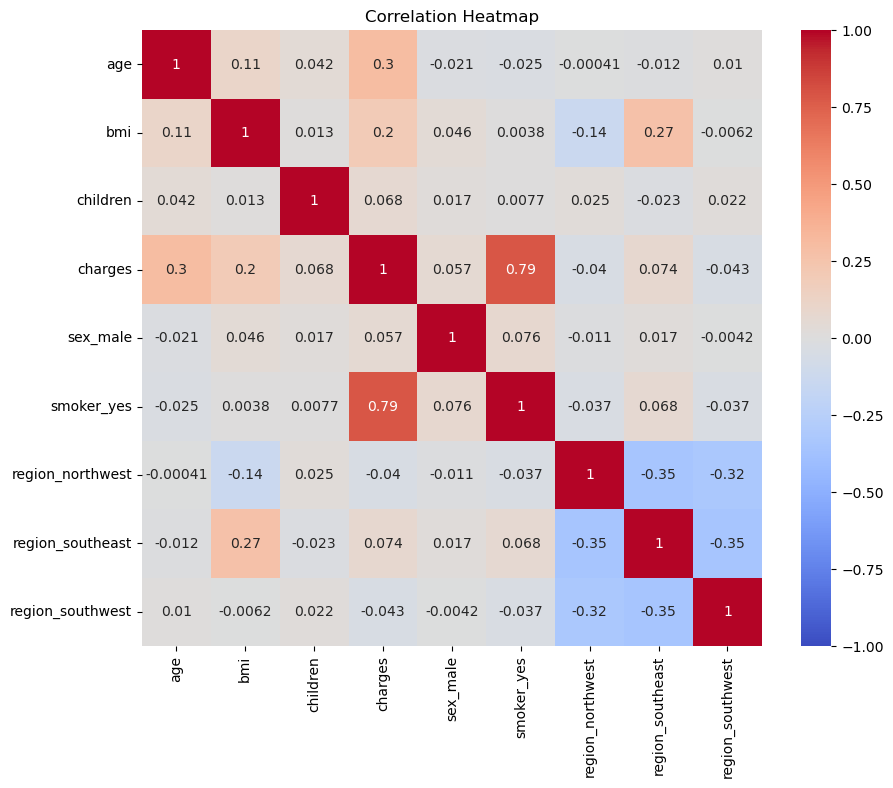

In [69]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

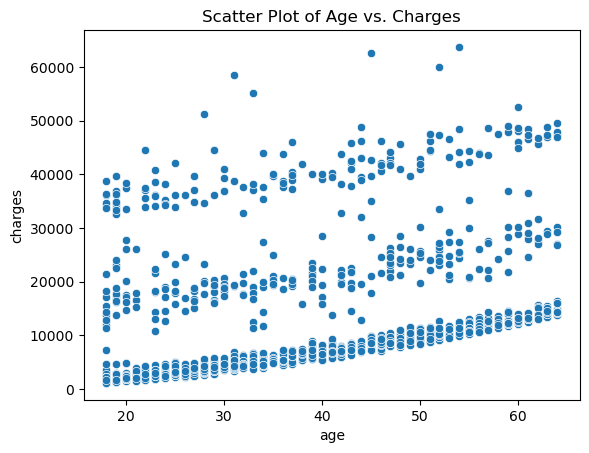

In [79]:
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Scatter Plot of Age vs. Charges')
plt.show()

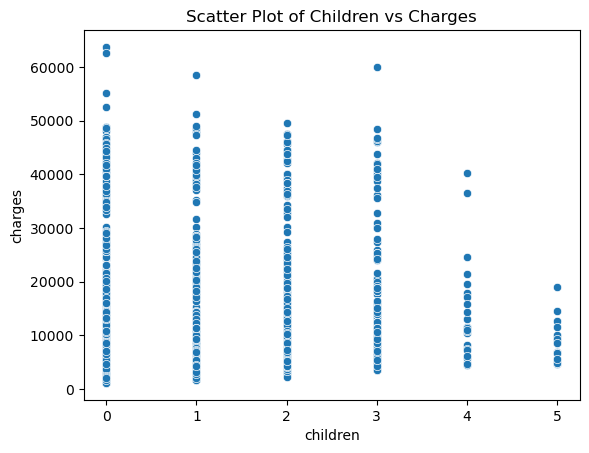

In [81]:
sns.scatterplot(x='children', y='charges', data=data)
plt.title('Scatter Plot of Children vs Charges')
plt.show()

In [83]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, zscore, norm
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering dataset for smokers
smokers_data = data[data['smoker'] == 'yes']

# One-sample t-test
t_stat, p_val = ttest_1samp(smokers_data['charges'], 20000)
print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: 17.282503464648208
P-Value: 1.0169677384020821e-45


In [85]:
# Split data by smoker status
non_smokers_data = data[data['smoker'] == 'no']

# Two-sample t-test
t_stat, p_val = ttest_ind(smokers_data['charges'], non_smokers_data['charges'])
print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: 46.66492117272371
P-Value: 8.271435842179102e-283


In [87]:
# Define groups based on age
under_30 = data[data['age'] < 30]['charges']
over_30 = data[data['age'] >= 30]['charges']

# Mean and standard deviation
mean_diff = np.mean(under_30) - np.mean(over_30)
std_dev = np.sqrt((np.var(under_30) / len(under_30)) + (np.var(over_30) / len(over_30)))

# z-score calculation
z_score = mean_diff / std_dev
p_val = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test
print("Z-Score:", z_score)
print("P-Value:", p_val)

Z-Score: -8.669682802889714
P-Value: 0.0


In [90]:
import pandas as pd
from scipy import stats

In [100]:
# One-Tailed Test: Checks if older patients (≥50) have higher charges than younger ones.
older_patients_charges = data[data['age'] >= 50]['charges']
younger_patients_charges = data[data['age'] < 50]['charges']
t_stat, p_value = stats.ttest_ind(older_patients_charges, younger_patients_charges, alternative='greater')
print("\nOne-Tailed t-Test (Older Patients vs Younger Patients)")
print("t-statistic:", t_stat, "p-value:", p_value)


One-Tailed t-Test (Older Patients vs Younger Patients)
t-statistic: 9.164859162699898 p-value: 9.080705367118653e-20


In [102]:
# Two-Tailed Test: Tests if high BMI patients have different charges than low BMI ones.
high_bmi_charges = data[data['bmi'] >= 30]['charges']
low_bmi_charges = data[data['bmi'] < 30]['charges']
t_stat, p_value = stats.ttest_ind(high_bmi_charges, low_bmi_charges)
print("\nTwo-Tailed t-Test (High BMI vs Low BMI)")
print("t-statistic:", t_stat, "p-value:", p_value)


Two-Tailed t-Test (High BMI vs Low BMI)
t-statistic: 7.442815495893551 p-value: 1.7585561273951227e-13


In [98]:
# Hypothesis Testing for Regional Variance in Charges:
# Group data by region
charges_southwest = data[data['region'] == 'southwest']['charges']
charges_southeast = data[data['region'] == 'southeast']['charges']
charges_northwest = data[data['region'] == 'northwest']['charges']
charges_northeast = data[data['region'] == 'northeast']['charges']

f_stat, p_value = stats.f_oneway(charges_southwest, charges_southeast, charges_northwest, charges_northeast)
print("\nANOVA Test (Regional Differences in Charges)")
print("F-statistic:", f_stat, "p-value:", p_value)


ANOVA Test (Regional Differences in Charges)
F-statistic: 2.96962669358912 p-value: 0.0308933560705201


In [104]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for 'sex' and 'smoker'
contingency_table_sex_smoker = pd.crosstab(data['sex'], data['smoker'])

# Perform the Chi-Square test of independence
chi2_sex_smoker, p_sex_smoker, dof_sex_smoker, expected_sex_smoker = chi2_contingency(contingency_table_sex_smoker)

print("Chi-Square Test Statistic (Sex vs. Smoker):", chi2_sex_smoker)
print("P-value (Sex vs. Smoker):", p_sex_smoker)
print("Degrees of Freedom:", dof_sex_smoker)
print("Expected Frequencies:\n", expected_sex_smoker)

# Interpretation
if p_sex_smoker < 0.05:
    print("Reject the null hypothesis: There is a significant association between sex and smoking status.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Chi-Square Test Statistic (Sex vs. Smoker): 7.39291081459996
P-value (Sex vs. Smoker): 0.006548143503580696
Degrees of Freedom: 1
Expected Frequencies:
 [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
Reject the null hypothesis: There is a significant association between sex and smoking status.


In [106]:
from scipy.stats import chisquare

# Observed frequencies for 'region'
observed_region_counts = data['region'].value_counts().sort_index()

# Assuming equal distribution across regions as expected frequencies
num_regions = observed_region_counts.size
total_patients = observed_region_counts.sum()
expected_region_counts = [total_patients / num_regions] * num_regions

# Perform the Chi-Square Goodness of Fit test
chi2_region, p_region = chisquare(f_obs=observed_region_counts, f_exp=expected_region_counts)

print("Chi-Square Test Statistic (Region Distribution):", chi2_region)
print("P-value (Region Distribution):", p_region)

# Interpretation
if p_region < 0.05:
    print("Reject the null hypothesis: The observed region distribution does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed region distribution matches the expected distribution.")

Chi-Square Test Statistic (Region Distribution): 3.4708520179372195
P-value (Region Distribution): 0.32456223960286096
Fail to reject the null hypothesis: The observed region distribution matches the expected distribution.


In [108]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set significance levels
alpha_values = [0.01, 0.05, 0.1]

# Scenario 1: Comparing Medical Charges for Smokers and Non-Smokers
smokers = data[data['smoker'] == 'yes']['charges']
non_smokers = data[data['smoker'] == 'no']['charges']

# Conduct t-tests and calculate Type I error probabilities
type_i_errors = []

for alpha in alpha_values:
    t_stat, p_value = stats.ttest_ind(smokers, non_smokers)
    if p_value < alpha:
        type_i_errors.append(True)  # Reject null hypothesis
    else:
        type_i_errors.append(False)  # Fail to reject null hypothesis

# Display Type I error results
for alpha, error in zip(alpha_values, type_i_errors):
    print(f"Type I Error at alpha={alpha}: {'Rejected H0' if error else 'Failed to Reject H0'}")

Type I Error at alpha=0.01: Rejected H0
Type I Error at alpha=0.05: Rejected H0
Type I Error at alpha=0.1: Rejected H0


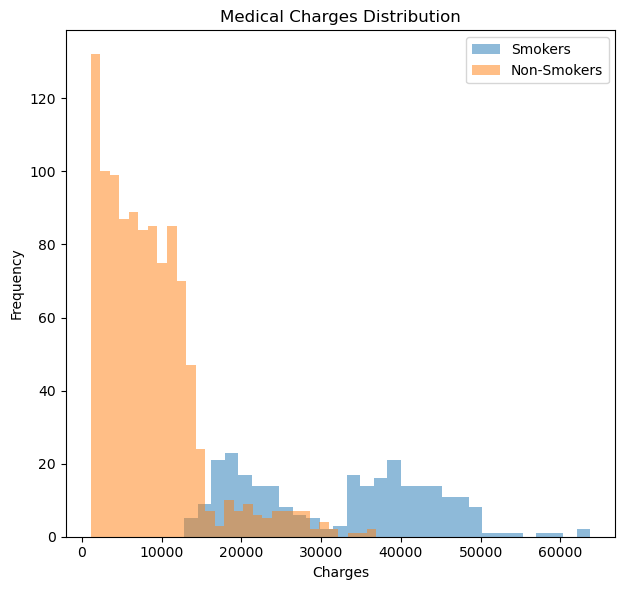

In [110]:
# Plotting distributions
plt.figure(figsize=(12, 6))

# Medical Charges
plt.subplot(1, 2, 1)
plt.hist(smokers, alpha=0.5, label='Smokers', bins=30)
plt.hist(non_smokers, alpha=0.5, label='Non-Smokers', bins=30)
plt.title('Medical Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [112]:
# Scenario 2: Comparing BMI for Individuals with and without Children
bmi_with_children = data[data['children'] > 0]['bmi']
bmi_without_children = data[data['children'] == 0]['bmi']

# Conduct t-tests and calculate Type II error probabilities
type_ii_errors = []

# Generate a smaller sample size for the test
small_sample_bmi_with_children = np.random.choice(bmi_with_children, size=30, replace=False)
small_sample_bmi_without_children = np.random.choice(bmi_without_children, size=30, replace=False)

# Conduct t-test for small sample
t_stat_ii, p_value_ii = stats.ttest_ind(small_sample_bmi_with_children, small_sample_bmi_without_children)

# Check if we fail to reject the null hypothesis (Type II Error)
if p_value_ii >= 0.05:
    type_ii_errors.append(True)  # Fail to reject null hypothesis (Type II Error)
else:
    type_ii_errors.append(False)  # Reject null hypothesis

# Display Type II error result
print(f"Type II Error: {'Failed to Reject H0' if type_ii_errors[0] else 'Rejected H0'}")

Type II Error: Failed to Reject H0


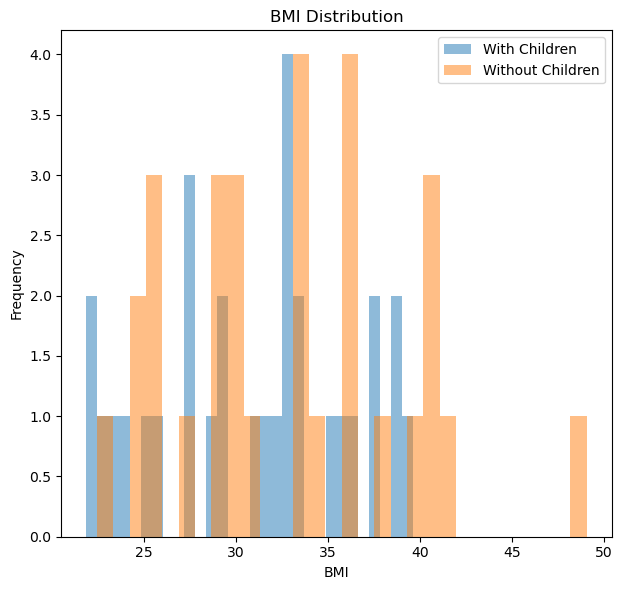

In [114]:
# Plotting distributions
plt.figure(figsize=(12, 6))

# BMI Comparison
plt.subplot(1, 2, 2)
plt.hist(small_sample_bmi_with_children, alpha=0.5, label='With Children', bins=30)
plt.hist(small_sample_bmi_without_children, alpha=0.5, label='Without Children', bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()